# Function Transformer

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
#loading datsat

df = pd.read_csv('dataset/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
#checking null values

df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
#filling the null values

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.sample(5)

,Survived,Age,Fare
744,1,31.0,7.9250
171,0,4.0,29.1250
325,1,36.0,135.6333
340,1,2.0,26.0000
516,1,34.0,10.5000


In [64]:
#spliting X and Y

x = df.drop(['Survived'],axis=1)
y = df[['Survived']]

In [65]:
x.head(2)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833


In [66]:
#Train test splite

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state=1) 

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age QQ Plot')

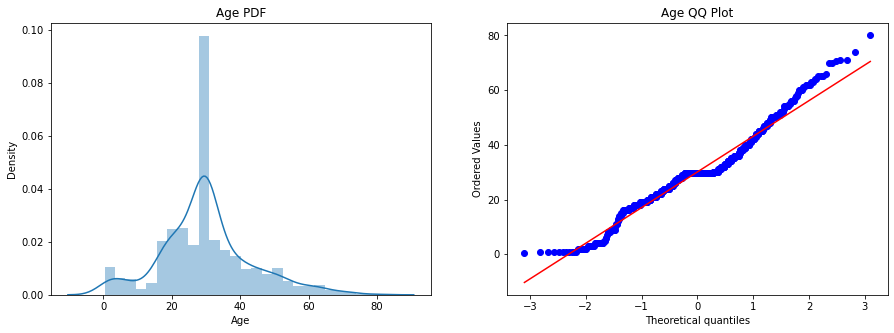

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Age PDF')
sns.distplot(xtrain['Age'])


plt.subplot(122)
stats.probplot(xtrain['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')



C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare QQ Plot')

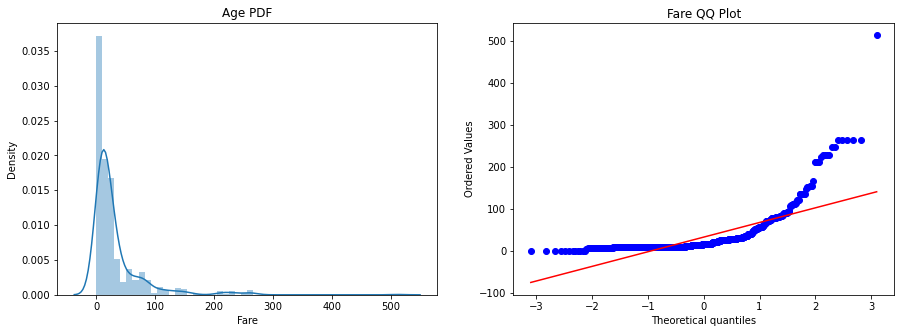

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Age PDF')
sns.distplot(xtrain['Fare'])


plt.subplot(122)
stats.probplot(xtrain['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

In [76]:
#checking the accuracy

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
lg  = LogisticRegression()
dtc = DecisionTreeClassifier()

In [88]:
lg.fit(xtrain,ytrain)
dtc.fit(xtrain,ytrain)


pre_lg  = lg.predict(xtest)
pre_dtc = dtc.predict(xtest)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
print("Logistic Regression accuracy : ",accuracy_score(ytest,pre_lg)*100)
print("DecisionTreeClassifier accuracy : ",accuracy_score(ytest,pre_dtc)*100)

Logistic Regression accuracy :  60.33519553072626
DecisionTreeClassifier accuracy :  62.56983240223464


In [93]:
trf = FunctionTransformer(func=np.log1p)

In [94]:
xtrain_transformed = trf.fit_transform(xtrain)
xtest_transformed = trf.transform(xtest)

In [96]:
lg_2  = LogisticRegression()
dtc_2 = DecisionTreeClassifier()

lg_2.fit(xtrain_transformed,ytrain)
dtc_2.fit(xtest_transformed,ytest)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()

In [97]:
pre_lg_2 = lg_2.predict(xtest_transformed)
pre_dtc_2 = dtc_2.predict(xtest_transformed)


print("Logistic Regression accuracy : ",accuracy_score(ytest,pre_lg_2)*100)
print("DecisionTreeClassifier accuracy : ",accuracy_score(ytest,pre_dtc_2)*100)

Logistic Regression accuracy :  63.687150837988824
DecisionTreeClassifier accuracy :  98.88268156424581
